# How to Train YOLOv9 on a Custom Dataset and export as ONNX
---
[YOLOv9 Github](https://github.com/WongKinYiu/yolov9?tab=readme-ov-file)

## Setup:
This jupiter notebook will require either a docker container, a properly setup ubuntu, or google colab.  
Information to setup a docker container can be found on the [YOLOv9 Github](https://github.com/WongKinYiu/yolov9?tab=readme-ov-file)  
I personally recommend utilizing google colab for free access to server grade GPUs. Sometimes GPUs on google colab are not avaliable for free, you should be able to wait until they are avaliable without paying  
This can be done by navigating to [Google Colab](https://colab.research.google.com/), `New` -> `Upload Notebook`  

## Cuda Confirmation
Let's make sure that we have access to GPU.  
If this does not work on your local machine, you need to install cuda drivers.  
If this does not work on Google Colab navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Fri Sep 20 16:21:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Clone and Install

In [3]:
!git clone https://github.com/WongKinYiu/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 781, done.
remote: Total 781 (delta 0), reused 0 (delta 0), pack-reused 781 (from 1)
Receiving objects: 100% (781/781), 3.27 MiB | 19.47 MiB/s, done.
Resolving deltas: 100% (331/331), done.
/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.0 MB/s eta 0:00:00


NOTE: Let's install the [`roboflow`](https://pypi.org/project/roboflow) package, which we will use to download our dataset from [Roboflow Universe](https://universe.roboflow.com/).

In [4]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.0 MB/s eta 0:00:00


## Download model weights

This downloads every model size published by yolov9, if desired comment out weights you do not plan to use

In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-s.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-m.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-s.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-m.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 1083560
drwxr-xr-x 2 root root      4096 Sep 20 15:21 .
drwxr-xr-x 1 root root      4096 Sep 20 15:06 ..
-rw-r--r-- 1 root root  51508261 Feb 18  2024 gelan-c.pt
-rw-r--r-- 1 root root  51508261 Feb 18  2024 gelan-c.pt.1
-rw-r--r-- 1 root root 117203713 Feb 18  2024 gelan-e.pt
-rw-r--r-- 1 root root 117203713 Feb 18  2024 gelan-e.pt.1
-rw-r--r-- 1 root root  40711265 Jun  1 12:20 gelan-m.pt
-rw-r--r-- 1 root root  40711265 Jun  1 12:20 gelan-m.pt.1
-rw-r--r-- 1 root root  15075033 Jun  5 11:34 gelan-s.pt
-rw-r--r-- 1 root root  15075033 Jun  5 11:34 gelan-s.pt.1
-rw-r--r-- 1 root root 103153312 Feb 18  2024 yolov9-c.pt
-rw-r--r-- 1 root root 103153312 Feb 18  2024 yolov9-c.pt.1
-rw-r--r-- 1 root root 140217688 Feb 18  2024 yolov9-e.pt
-rw-r--r-- 1 root root 140217688 Feb 18  2024 yolov9-e.pt.1
-rw-r--r-- 1 root root  66462416 Jun  1 12:27 yolov9-m.pt
-rw-r--r-- 1 root root  66462416 Jun  1 12:27 yolov9-m.pt.1
-rw-r--r-- 1 root root  20423912 Jun  5 11:34 yolov9-s.pt
-rw-r--r-- 1 

this declares a dictionary to provide file paths for the models later on

In [ ]:
models = {"yolov9-s" : (f"{HOME}/weights/yolov9-s", f"models/detect/yolov9-s.yaml"),
          "yolov9-m" : (f"{HOME}/weights/yolov9-m", f"models/detect/yolov9-m.yaml"),
          "yolov9-c" : (f"{HOME}/weights/yolov9-c", f"models/detect/yolov9-c.yaml"),
          "yolov9-e" : (f"{HOME}/weights/yolov9-e", f"models/detect/yolov9-e.yaml"),
          "gelan-s" : (f"{HOME}/weights/gelan-s", f"models/detect/gelan-s.yaml"),
          "gelan-m" : (f"{HOME}/weights/gelan-m", f"models/detect/gelan-m.yaml"),
          "gelan-c" : (f"{HOME}/weights/gelan-c", f"models/detect/gelan-c.yaml"),
          "gelan-e" : (f"{HOME}/weights/gelan-e", f"models/detect/gelan-e.yaml"),
          }

## Authenticate and Download the Dataset

**NOTE:** The dataset must be saved inside the `{HOME}/yolov9` directory, otherwise, the training will not succeed.  
**NOTE** You need a roboflow account to download datasets, it will prompt for an API key, you should be able to click a link and login for this API key

In [ ]:
%cd {HOME}/yolov9

/content/yolov9


In [5]:
import roboflow

roboflow.login()

rf = roboflow.Roboflow()

# REPLACE THIS WITH THE ROBOFLOW PROJECT, THIS HAS NOT BEEN CREATED AT TIME OF WRITING
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
version = project.version(8)
dataset = version.download("yolov9")

visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-detection-8 in yolov9:: 100%|██████████| 522/522 [00:00<00:00, 2638.59it/s]


## Train Custom Model

In [ ]:
%cd {HOME}/yolov9
model = models['gelan-c'] #Replace with desired model
!python train.py \
--batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {model[0]} \
--cfg {model[1]} \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-09-20 15:21:15.018736: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-20 15:21:15.040994: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-20 15:21:15.047161: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-20 15:21:15.062069: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-20 15:21:16.372197: W

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [ ]:
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png				    labels_correlogram.jpg  PR_curve.png  weights
events.out.tfevents.1726842837.74befe989bb7.4908.0  labels.jpg		    R_curve.png
F1_curve.png					    opt.yaml		    results.csv
hyp.yaml					    P_curve.png		    results.png


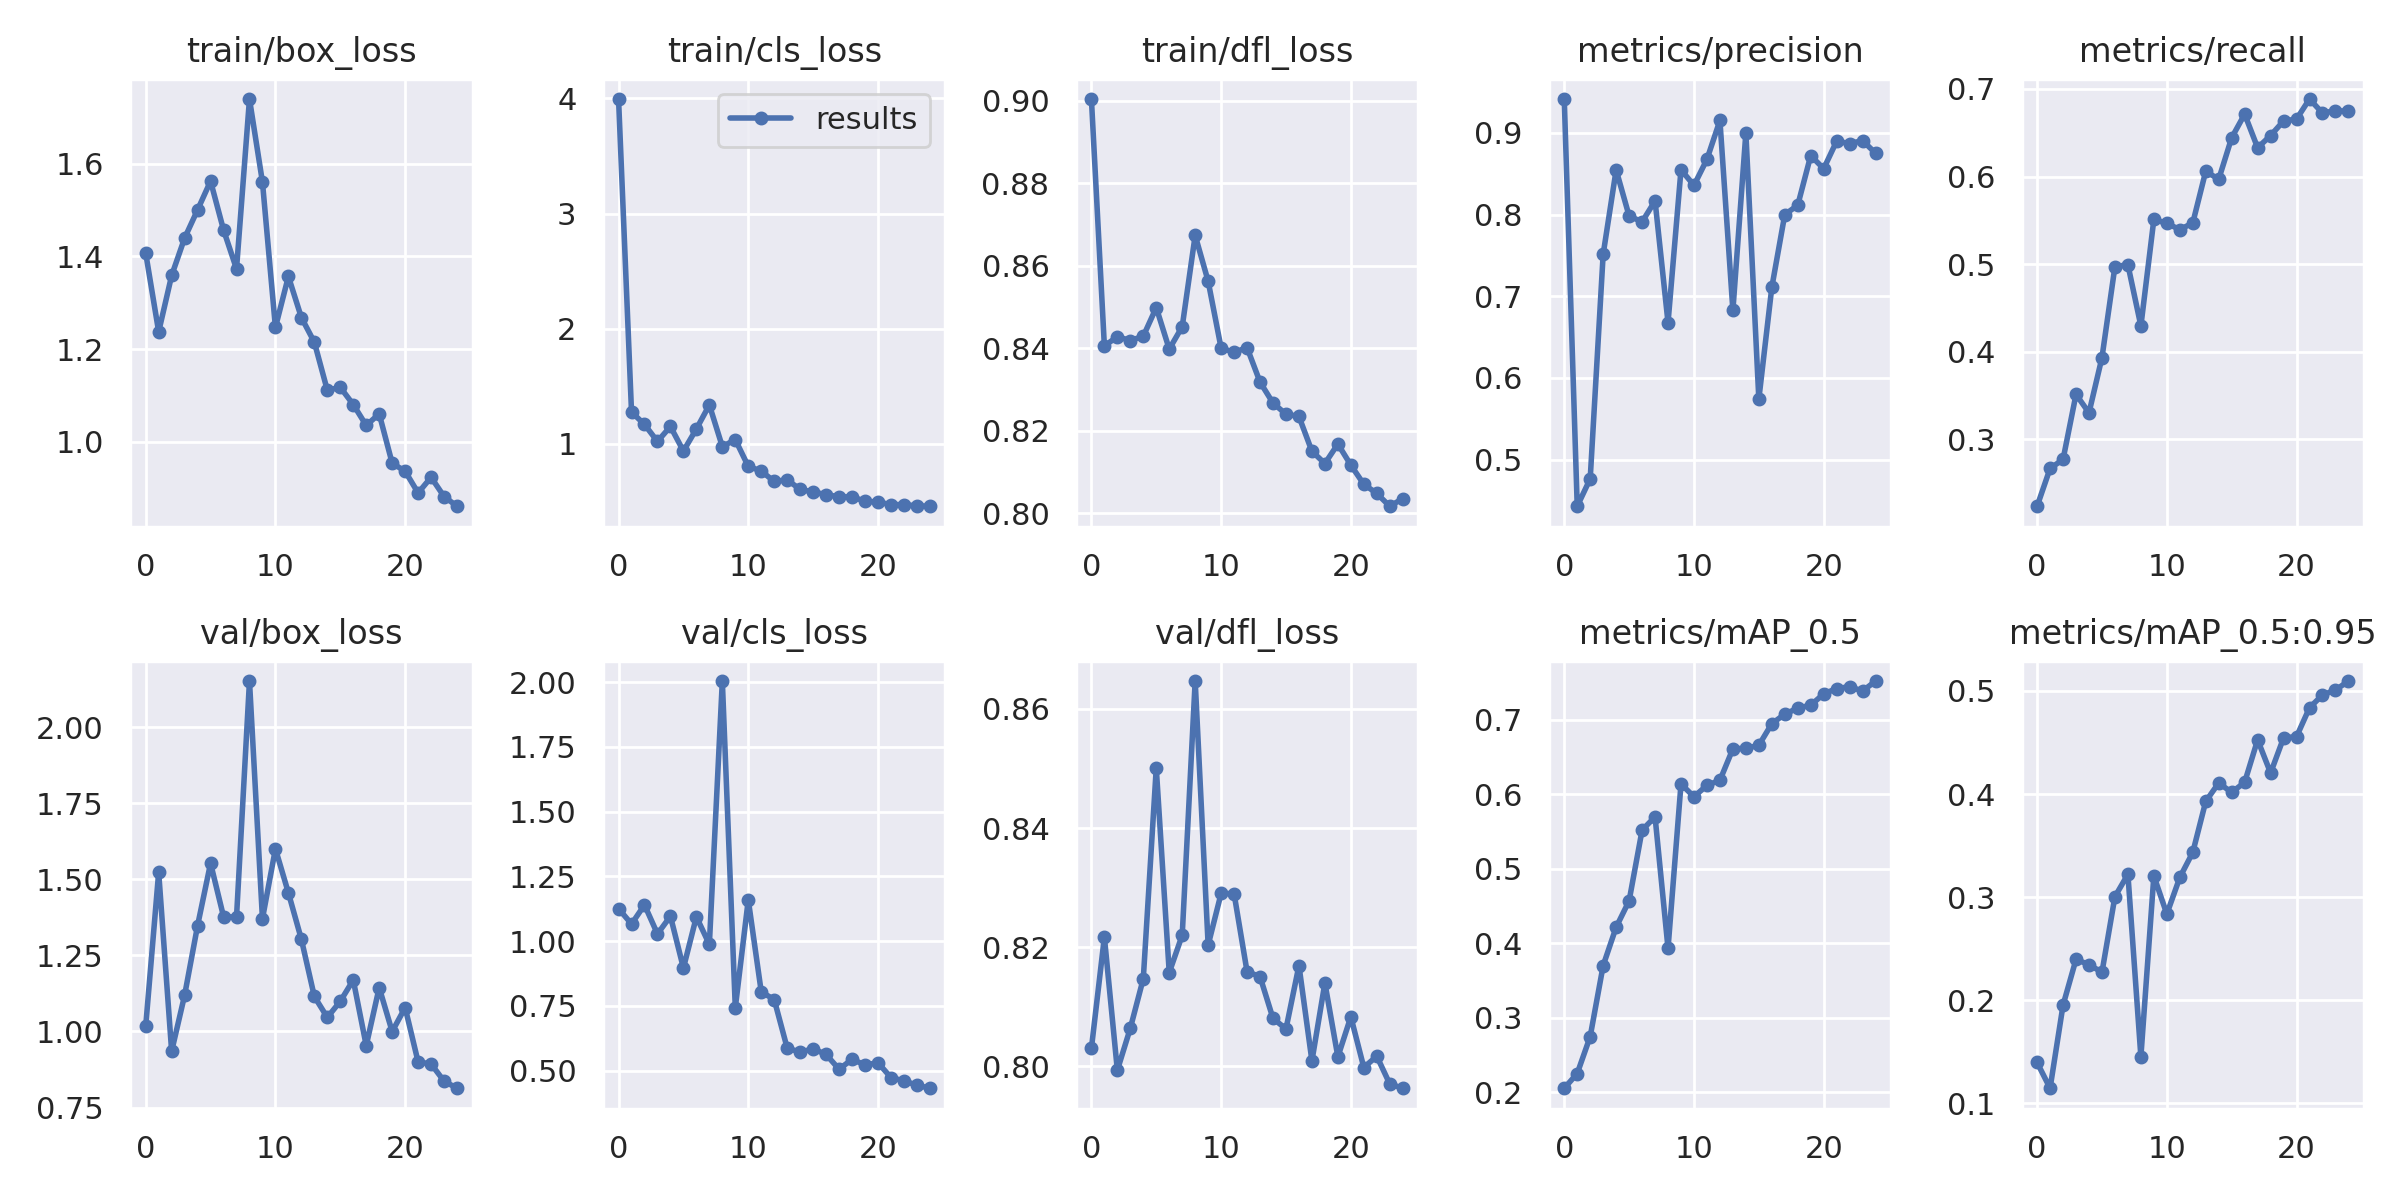

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

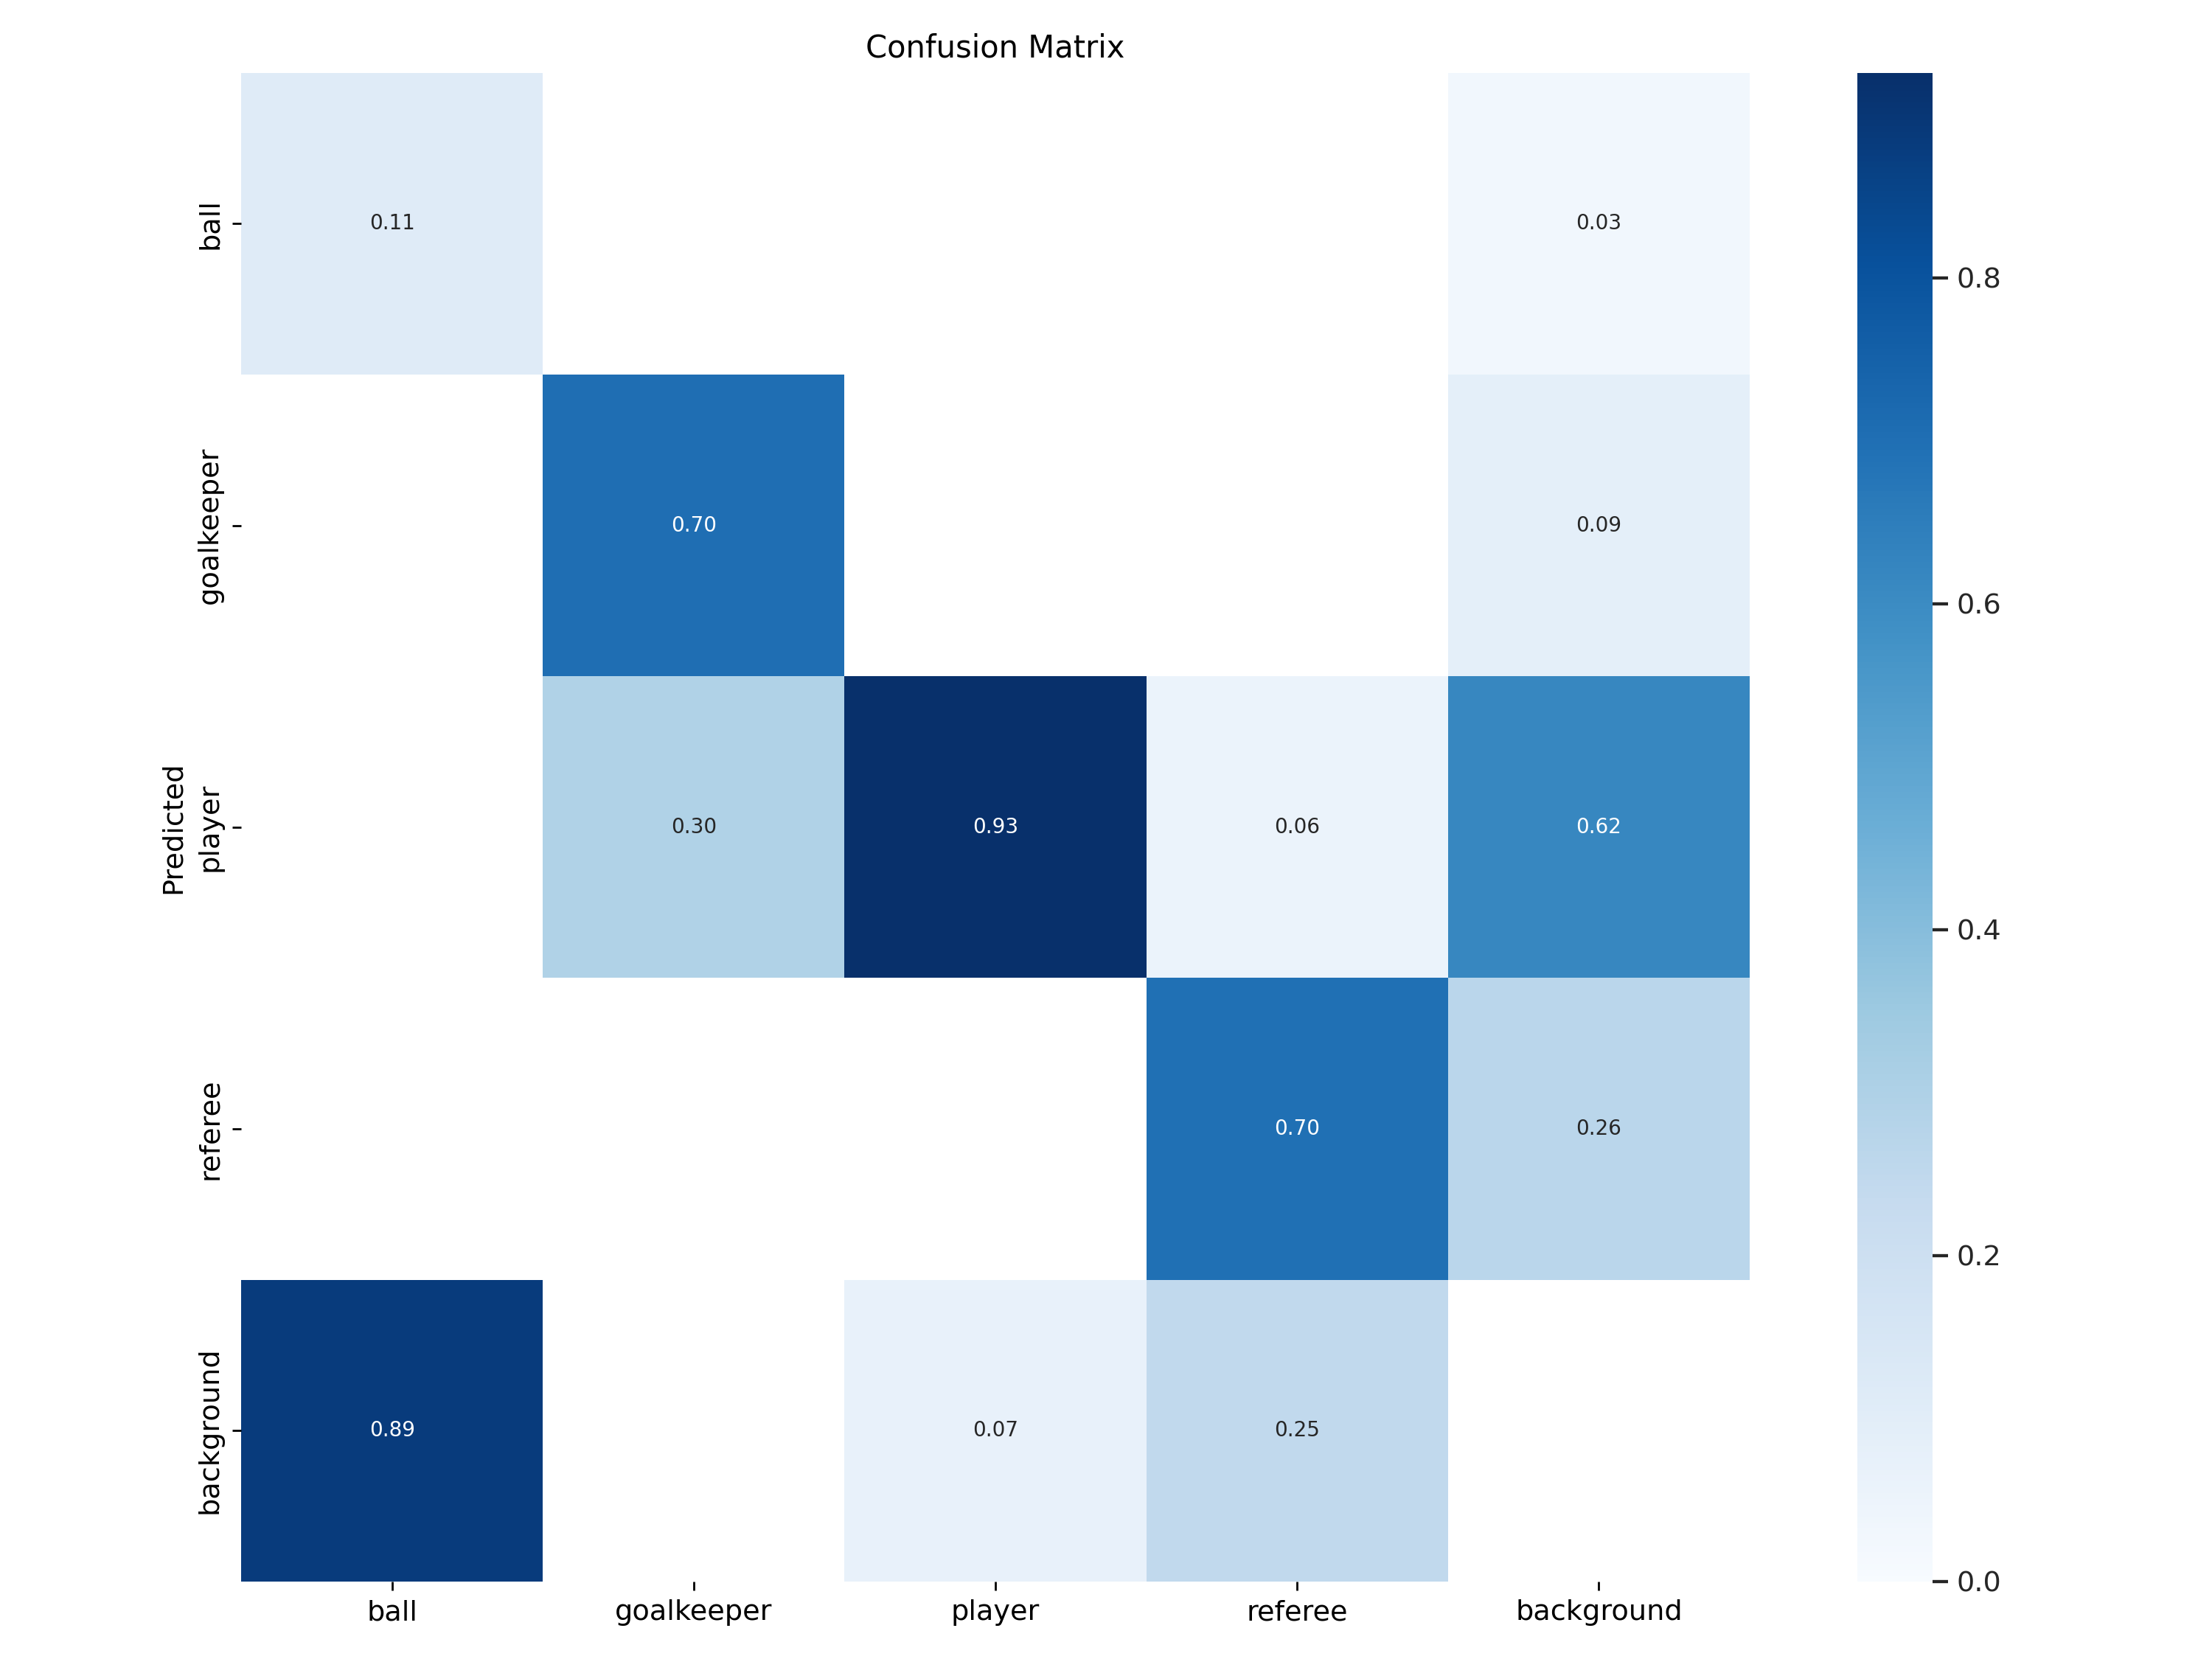

In [ ]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

## Validate Custom Model

In [ ]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt

/content/yolov9
val: data=/content/yolov9/football-players-detection-8/data.yaml, weights=['/content/yolov9/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True

## Inference with Custom Model
**NOTE** This section currently doesnt work that well due to YOLOv9 Changes (image files are no longer saved in output files anymore), it has been left as an example in case you wanted to do inferencing inside of the YOLO envirement for some reason

In [ ]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source {dataset.location}/test/images

detect: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=/content/yolov9/football-players-detection-8/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more det

**NOTE:** Just like behore, the inference results have been saved in the appropriate directory inside `{HOME}/yolov9/runs/detect/`. Let's examine few of those results.

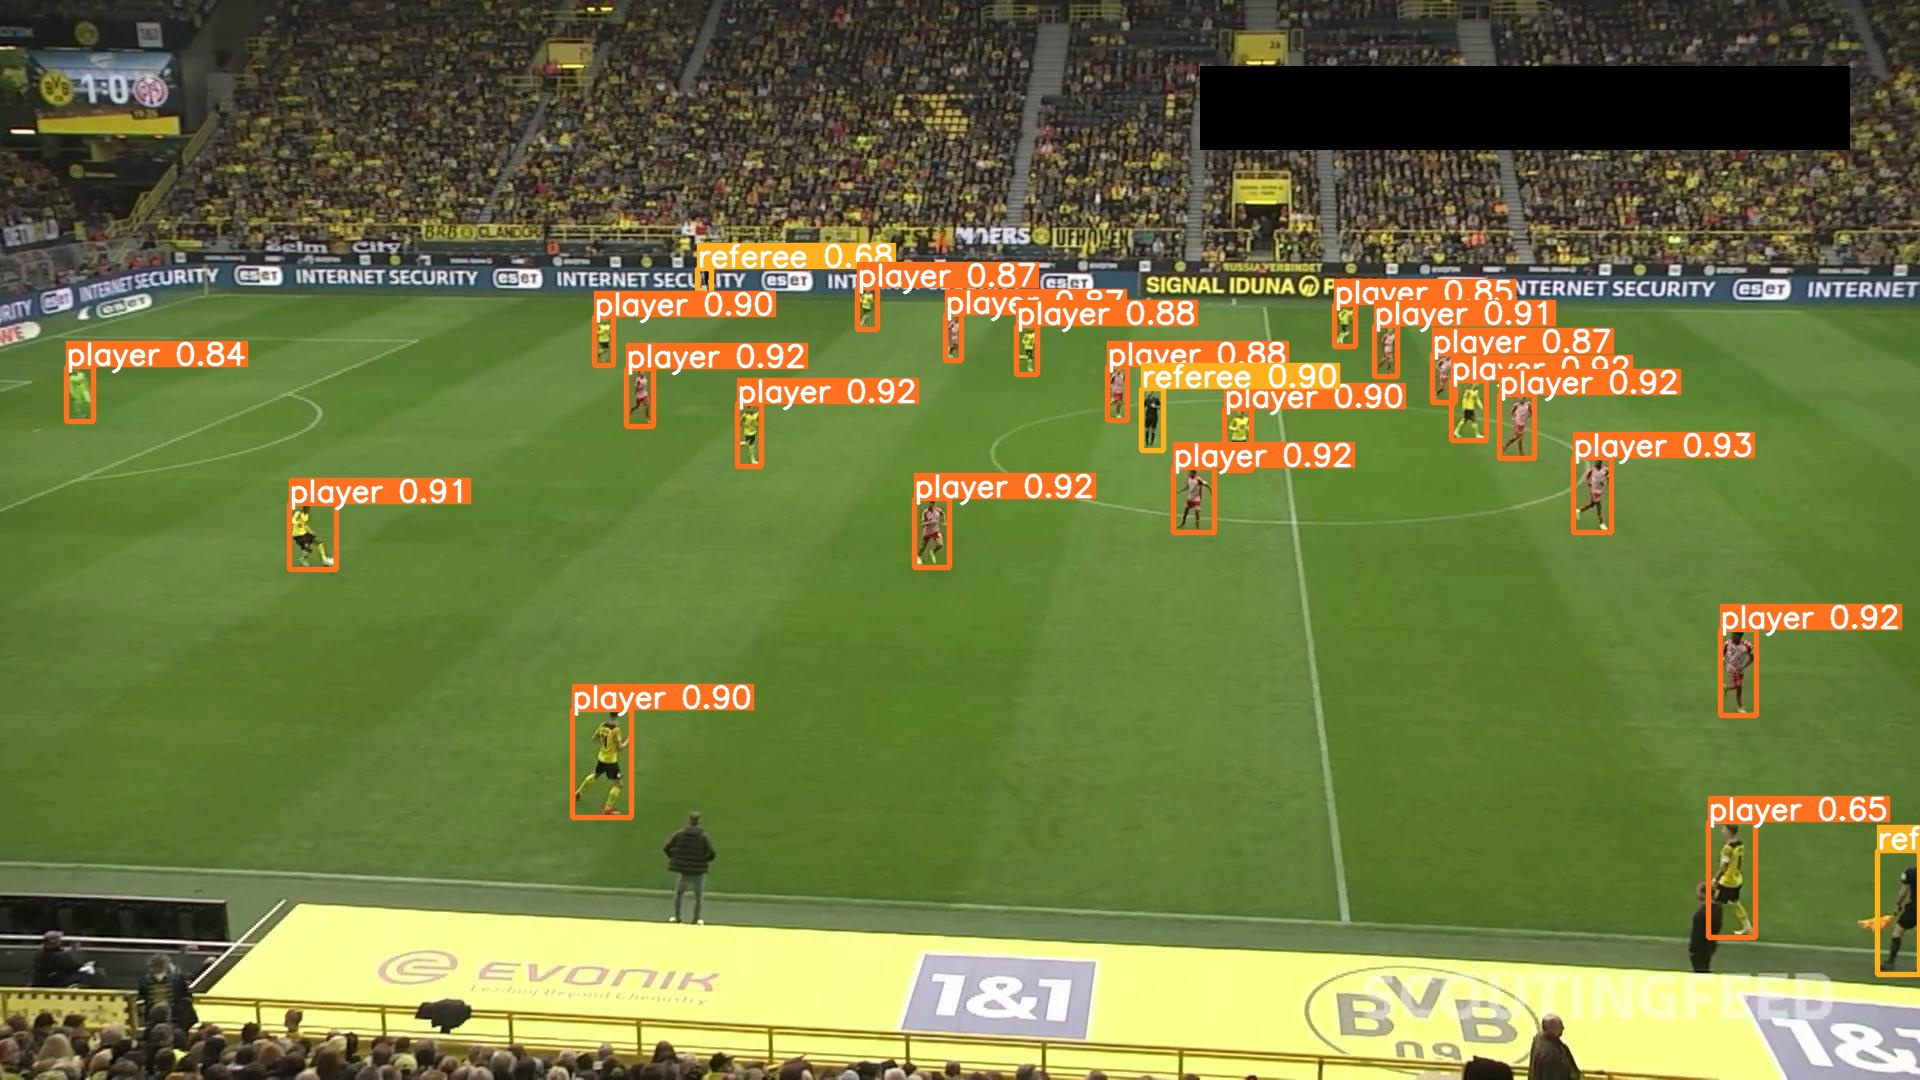

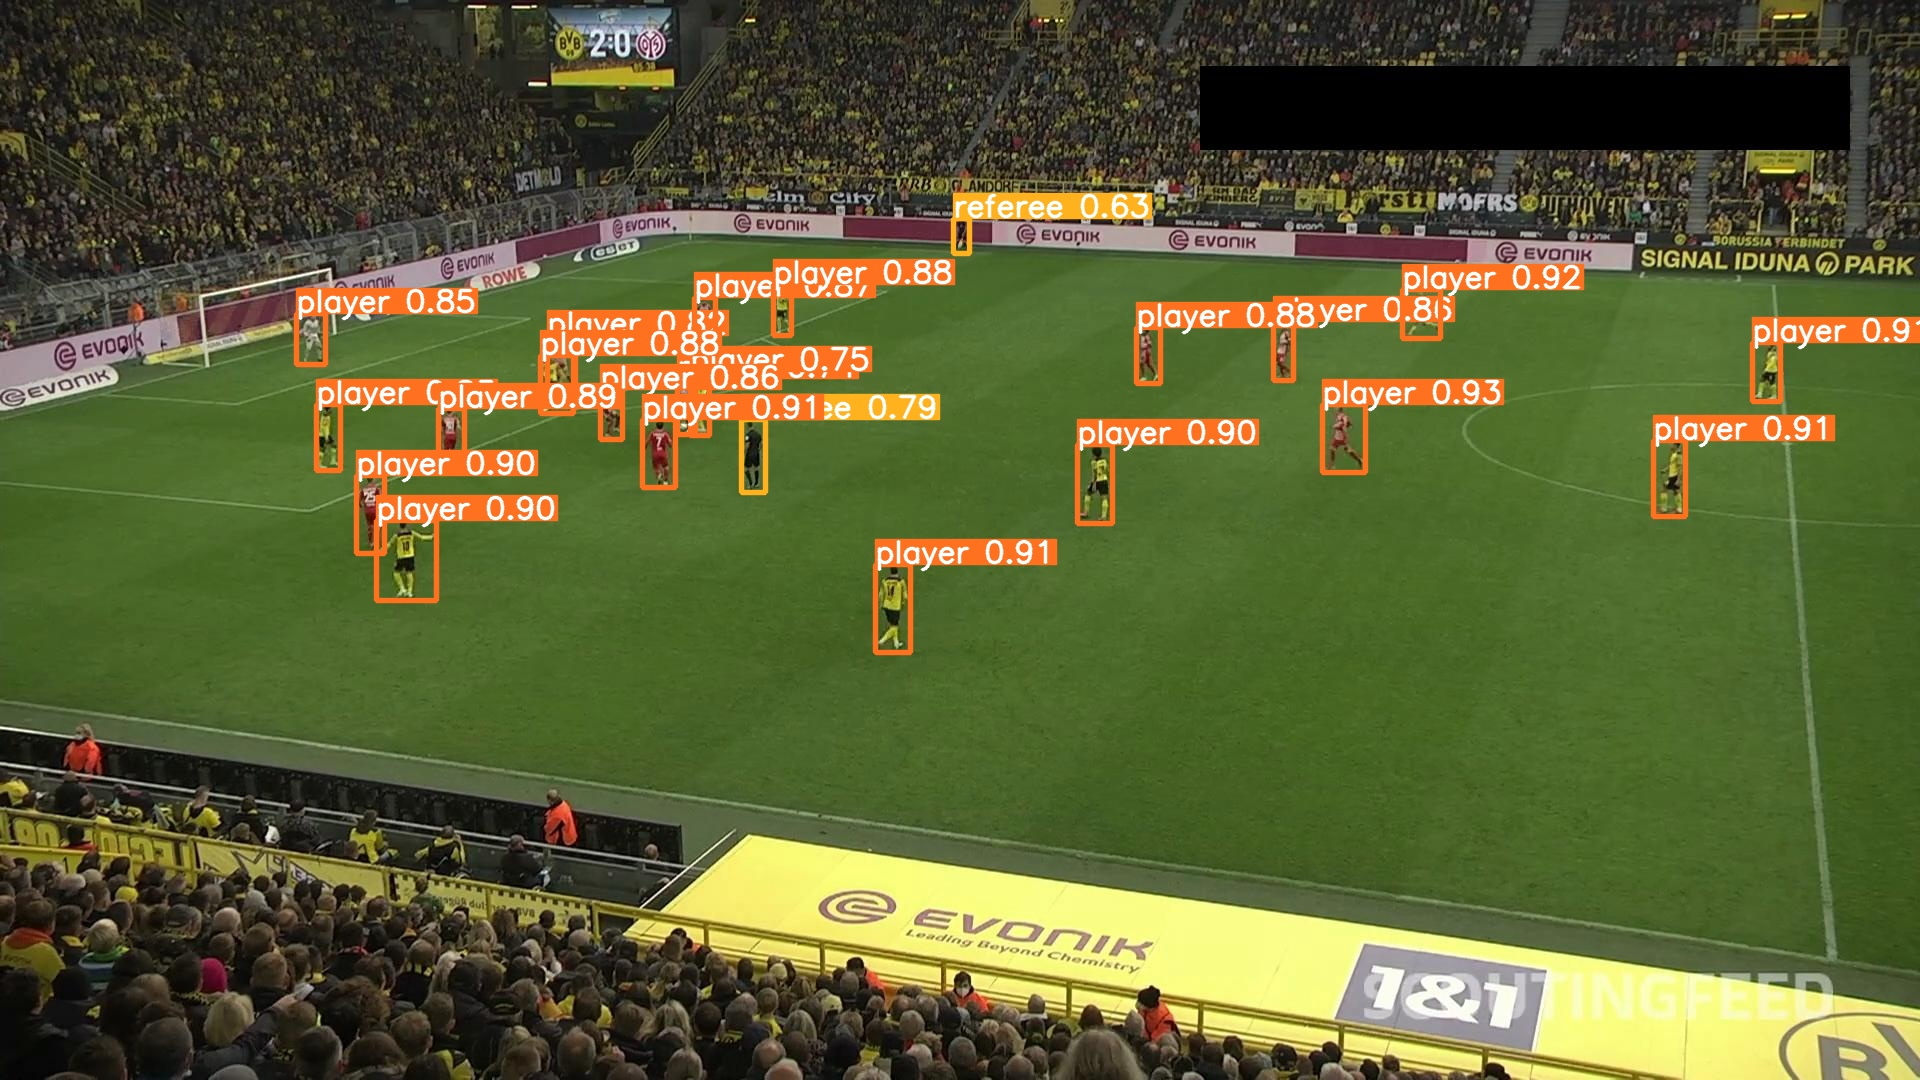

In [ ]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp2/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))

## ONNX File Convertion

In [ ]:
!pip install onnxruntime
!pip install onnx

In [ ]:
import torch
import shutil
%cd {HOME}

checkpoint_model = f'{HOME}/yolov9/runs/train/exp/weights/best.pt'
checkpoint = torch.load(checkpoint_model, map_location='cuda')
model = checkpoint['model']
model.float()
model.eval()

for name, module in model.named_modules():
    if hasattr(module, 'fuse_convs'):
        module.fuse_convs()
        module.forward = module.forward_fuse

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

inputs = torch.randn(1, 3, 640, 640).to(device)

torch.onnx.export(
    model,
    inputs,
    f'{HOME}/output.onnx'
)

shutil.copy(checkpoint_model, f"{HOME}/output.pt")

/content


You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value wil

'/content/output.pt'

## CLASS YAML
**NOTE** This is used by onnx inferencing, onnx does not have a way to encode output labels as will only output labels as integers which is not very useful most of the time. This yaml file is used by the onnx inferencing engine to map the model outputs with what objects they actually relate to. the output file should look simular to

names
    0:Ball
    1:Person
    2:Car

In [6]:
%cd {HOME}
import yaml

# Function to read input YAML, modify it, and write to output YAML
def process_yaml(input_file, output_file):
    # Load the input YAML file
    with open(input_file, 'r') as file:
        data = yaml.safe_load(file)

    # Extract and modify the 'names' field
    if "names" in data:
        names_with_indices = {i: name for i, name in enumerate(data["names"])}
        # Create a new structure with just the modified 'names'
        output_data = {"names": names_with_indices}

        # Write the output to a new YAML file
        with open(output_file, 'w') as file:
            yaml.dump(output_data, file, default_flow_style=False)

# Example usage
input_file = f'{dataset.location}/data.yaml'
output_file = 'metadata.yaml'
process_yaml(input_file, output_file)

/content
